#Importing Libraries & Dataset  <a id='1'></a>

In [118]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px

In [135]:
pip install nb2xls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 7.2 MB/s eta 0:00:00
  Created wheel for nb2xls: filename=nb2xls-0.1.6-py3-none-any.whl size=9905 sha256=980bce6ab26420a19090b07bf2bb01cae6a37497b39a270dd29800bafc8e70e1
  Stored in directory: /root/.cache/pip/wheels/25/7a/ab/62800f369ec18d48ba61b1f25e9b2c062af5025d9a1fd4080e
Successfully built nb2xls


In [119]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [120]:
path = '/drive/MyDrive/Colab Notebooks/'

In [121]:
df = pd.read_excel('/drive/MyDrive/Colab Notebooks/DataCaseStudy.xlsx') 
df.rename(columns={"Unnamed: 0": "neighbourhood", "0-1999": "<=1999"},inplace=True)
df

,Neighbourhood,<=1999,2000-2999,3000-3999,4000-4999,5000-5999,6000-6999,7000-7999,8000-8999,9000-9999,10000-10999,11000-11999,12000-12999,13000-13999,14000-14999,>= 15000
0,A,0.0329,0.079916,0.173031,0.139009,0.113150,0.098731,0.076331,0.055649,0.05136,0.041871,0.034666,0.016490,0.016803,0.015846,0.054248
1,B,0.0929,0.122831,0.156868,0.142180,0.102218,0.090620,0.061402,0.054590,0.03275,0.029134,0.021937,0.012768,0.012383,0.011242,0.056177
2,C,0.0170,0.035000,0.094000,0.121800,0.114400,0.095200,0.082300,0.069400,0.06310,0.048800,0.042700,0.034000,0.027400,0.020100,0.134800


In [122]:
df.iloc[:,1:]= df.iloc[:,1:]*100
df

,Neighbourhood,<=1999,2000-2999,3000-3999,4000-4999,5000-5999,6000-6999,7000-7999,8000-8999,9000-9999,10000-10999,11000-11999,12000-12999,13000-13999,14000-14999,>= 15000
0,A,3.29,7.991561,17.303055,13.900866,11.314972,9.873113,7.633101,5.564927,5.136007,4.187063,3.466635,1.648967,1.680292,1.584646,5.424795
1,B,9.29,12.283072,15.686811,14.218000,10.221801,9.061989,6.140186,5.459017,3.274978,2.913418,2.193741,1.276755,1.238334,1.124177,5.617721
2,C,1.70,3.500000,9.400000,12.180000,11.440000,9.520000,8.230000,6.940000,6.310000,4.880000,4.270000,3.400000,2.740000,2.010000,13.480000


# Question 1 <a id='11'></a>


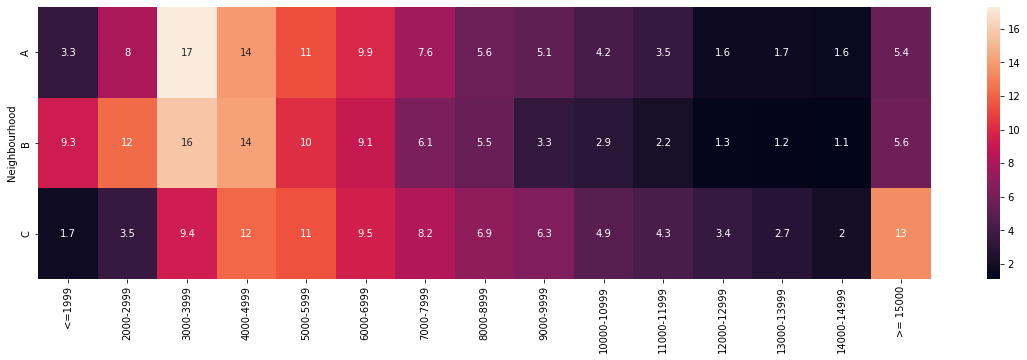

In [123]:
Q1 = df.set_index("Neighbourhood")
plt.figure(figsize=(20,5))
sns.heatmap(Q1,annot=True)
plt.show()

###Observation for Q1
The heatmap above shows that the brightest points all congregate around the income range of 3k - 3,999, and 6k-6,999, which consists mostly of households from Neighbourhood A and B.
Neighbourhood C on the other hand shows the highest percentage of households that has more than 15k of Income Range.Therefore, Neighbourhood C is the wealthiest neighrbourhood in the country

# Question 2 <a id='11'></a>


## Q2.1 <a id='1.1'></a>

In [125]:
#Extracting data from excel sheet 
df2 = pd.read_excel('/drive/MyDrive/Colab Notebooks/DataCaseStudy.xlsx',sheet_name='Q2 data') 
df2= df2.drop(columns=['Property building category.1','Property building type.1'])#Dropping Comparable Columns 
df2.rename(columns={"Property building category": "build_category", "Property building type": "build_type","Built up price psf":"psf_price","Size built up":"size"},inplace=True)#Renaming Columns 
df2

,Id,build_category,build_type,Title,psf_price,size,Valuation price,YEAR,QUARTER,NAME,Year completion
0,464152,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,981.436464,905,888200,2015,20152,ASTRA SUITES,2004
1,464156,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1049.723757,905,950000,2015,20152,ASTRA SUITES,2004
2,464157,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,892.370572,367,327500,2014,20142,ASTRA SUITES,2004
3,464158,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1061.516854,356,377900,2014,20144,ASTRA SUITES,2004
4,469885,HIGHRISE,SERVICE APARTMENT,COMMERCIAL,1059.334126,841,890900,2014,20144,ASTRA SUITES,2004
...,...,...,...,...,...,...,...,...,...,...,...
246,838224,HIGHRISE,CONDO,RESIDENTIAL,404.024145,2485,1004000,2019,20191,RAINBOW APARTMENT,1987
247,463159,HIGHRISE,CONDO,RESIDENTIAL,513.721186,2733,1404000,2015,20153,RAINBOW APARTMENT,1987
248,558463,HIGHRISE,CONDO,RESIDENTIAL,415.660446,2733,1136000,2017,20173,RAINBOW APARTMENT,1987
249,519187,HIGHRISE,CONDO,RESIDENTIAL,769.509982,2755,2120000,2016,20161,RAINBOW APARTMENT,1987


In [126]:
df2 = df2.loc[df2.NAME>"FLAT JALAN AMAN"].reset_index()
df2.QUARTER= df2.QUARTER.astype(str)
df2

,index,Id,build_category,build_type,Title,psf_price,size,Valuation price,YEAR,QUARTER,NAME,Year completion
0,102,491472,HIGHRISE,CONDO,RESIDENTIAL,915.566133,743,680000,2014,20144,HARBOURVIEW,1994
1,103,497369,HIGHRISE,CONDO,RESIDENTIAL,1095.926202,730,800000,2014,20144,HARBOURVIEW,1994
2,104,463182,HIGHRISE,CONDO,RESIDENTIAL,746.270274,1313,980000,2015,20152,HARBOURVIEW,1994
3,105,463184,HIGHRISE,CONDO,RESIDENTIAL,1025.923075,1755,1800000,2015,20152,HARBOURVIEW,1994
4,106,467650,HIGHRISE,CONDO,RESIDENTIAL,1110.797146,743,825000,2015,20152,HARBOURVIEW,1994
...,...,...,...,...,...,...,...,...,...,...,...,...
144,246,838224,HIGHRISE,CONDO,RESIDENTIAL,404.024145,2485,1004000,2019,20191,RAINBOW APARTMENT,1987
145,247,463159,HIGHRISE,CONDO,RESIDENTIAL,513.721186,2733,1404000,2015,20153,RAINBOW APARTMENT,1987
146,248,558463,HIGHRISE,CONDO,RESIDENTIAL,415.660446,2733,1136000,2017,20173,RAINBOW APARTMENT,1987
147,249,519187,HIGHRISE,CONDO,RESIDENTIAL,769.509982,2755,2120000,2016,20161,RAINBOW APARTMENT,1987


In [128]:
#Extracting data from excel sheet
df2a = pd.read_excel('/drive/MyDrive/Colab Notebooks/DataCaseStudy.xlsx',sheet_name='Average Price per sqf')
df2a

,NAME,20161,20162,20163,20164,20171,20172,20173,20174,20181,20182,20183,20184,20191,20192
0,ASTRA SUITES,989.499389,1010.762943,1015.867725,981.426457,1023.978202,NaN,1084.041726,1037.730766,997.689968,885.216631,963.778181,1455.040872,NaN,NaN
1,FLAT JALAN AMAN,272.532220,240.681435,189.336062,272.726710,NaN,NaN,228.022875,175.952716,NaN,NaN,NaN,240.681435,208.590577,160.45429
2,HARBOURVIEW,1104.328349,1117.415274,1004.500013,1162.409943,NaN,1066.100391,NaN,NaN,1221.497220,1267.146133,1331.545392,NaN,NaN,NaN
3,LILY POINT,551.953320,514.609944,520.465177,585.349835,506.640321,473.623311,456.187727,471.346276,614.249116,470.379558,441.137609,418.110617,NaN,NaN
4,RAINBOW APARTMENT,769.509982,NaN,735.967207,891.577928,356.727977,NaN,415.660446,723.883707,826.234269,NaN,882.381413,740.063731,404.024145,NaN


In [129]:
#Data Cleaning to get specific values such as QUARTER and and NAME
q = ["20161", "20162", "20163", "20164", "20171", "20172", "20173", "20174", "20181", "20182","20183", "20184", "20191", "20192"]
Q2_1 = df2[df2.QUARTER.isin(q)].drop(columns=["index"]).reset_index()
Q2_1.drop(columns=["index"],inplace=True)
Q2_1

,Id,build_category,build_type,Title,psf_price,size,Valuation price,YEAR,QUARTER,NAME,Year completion
0,472124,HIGHRISE,CONDO,RESIDENTIAL,1144.457666,743,850000,2016,20164,HARBOURVIEW,1994
1,474464,HIGHRISE,CONDO,RESIDENTIAL,1112.219422,764,850000,2016,20163,HARBOURVIEW,1994
2,480855,HIGHRISE,CONDO,RESIDENTIAL,1184.850289,743,880000,2016,20164,HARBOURVIEW,1994
3,481989,HIGHRISE,CONDO,RESIDENTIAL,1157.921874,743,860000,2016,20164,HARBOURVIEW,1994
4,485931,HIGHRISE,CONDO,RESIDENTIAL,1186.611961,3455,4100000,2016,20162,HARBOURVIEW,1994
...,...,...,...,...,...,...,...,...,...,...,...
97,474357,HIGHRISE,CONDO,RESIDENTIAL,720.724346,2485,1791000,2016,20163,RAINBOW APARTMENT,1987
98,838224,HIGHRISE,CONDO,RESIDENTIAL,404.024145,2485,1004000,2019,20191,RAINBOW APARTMENT,1987
99,558463,HIGHRISE,CONDO,RESIDENTIAL,415.660446,2733,1136000,2017,20173,RAINBOW APARTMENT,1987
100,519187,HIGHRISE,CONDO,RESIDENTIAL,769.509982,2755,2120000,2016,20161,RAINBOW APARTMENT,1987


In [131]:
#Finalized Data Frame for Question 1 
Q2_1a = pd.DataFrame(Q2_1.groupby(['QUARTER','NAME'])['psf_price'].mean())
Q2_1a['psf_price']=Q2_1a['psf_price'].round(decimals=2)
Q2_1a

psf_price
QUARTER NAME                        
20161   HARBOURVIEW          1104.33
        LILY POINT            551.95
        RAINBOW APARTMENT     769.51
20162   HARBOURVIEW          1117.42
        LILY POINT            514.61
20163   HARBOURVIEW          1004.50
        LILY POINT            520.47
        RAINBOW APARTMENT     735.97
20164   HARBOURVIEW          1162.41
        LILY POINT            585.35
        RAINBOW APARTMENT     891.58
20171   LILY POINT            506.64
        RAINBOW APARTMENT     356.73
20172   HARBOURVIEW          1066.10
        LILY POINT            473.62
20173   LILY POINT            456.19
        RAINBOW APARTMENT     415.66
20174   LILY POINT            471.35
        RAINBOW APARTMENT     723.88
20181   HARBOURVIEW          1221.50
        LILY POINT            614.25
        RAINBOW APARTMENT     826.23
20182   HARBOURVIEW          1267.15
        LILY POINT            470.38
20183   HARBOURVIEW          1331.55
        LILY POINT            441.14
        RAINBOW APARTMENT     882.38
20184   LILY POINT            418.11
        RAINBOW APARTMENT     740.06
20191   RAINBOW APARTMENT     404.02

<AxesSubplot:xlabel='QUARTER', ylabel='psf_price'>

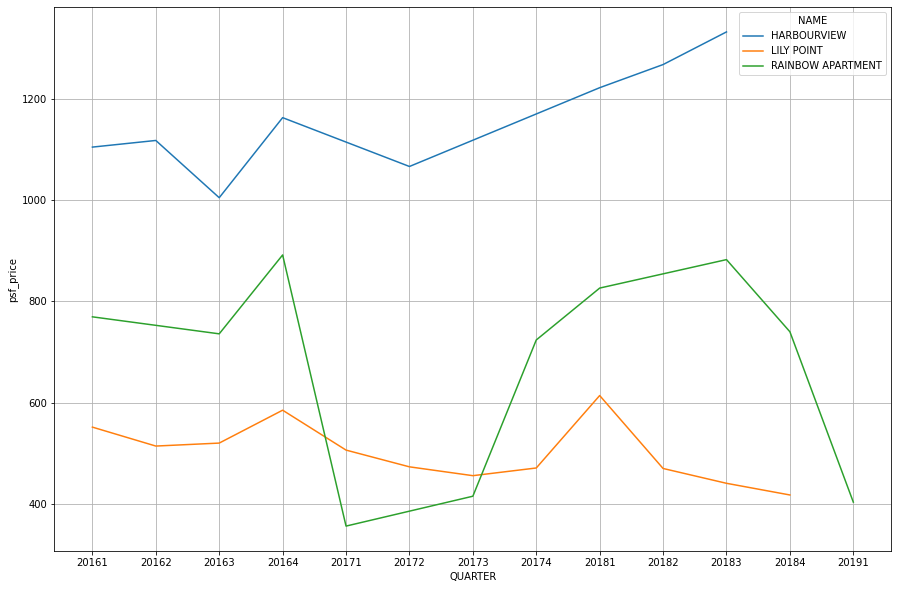

In [132]:
fig, ax =plt.subplots(figsize=(15,10))
plt.grid()
sns.lineplot(data=Q2_1a, x="QUARTER", y="psf_price",hue="NAME")

### Conclusion for Q2.1
As you can see that the average price per sqft for HARBOURVIEW is higher compared to the rest of the buildings along with LILY POINT being the lowest in terms of average price per sqft.HARBOURVIEW has the highest price since Q1 2016 until Q1 2018 compared to the others, while RAINBOW APARTMENT was higher than LILY POINT starting from Q1 2016, but price took a dip in Q1 2017, and rose back up again in Q3 2017

## Q2.2 <a id='1.1'></a>

In [23]:
Q2_2 = pd.DataFrame(Q2_1.groupby(["QUARTER","NAME"])['psf_price'].median())
Q2_2.reset_index(inplace=True)
Q2_2.rename(columns={"psf_price":"median"},inplace=True)
Q2_2["mean"]= Q2_1["psf_price"]
Q2_2["median"]= Q2_2["median"].astype(int)
Q2_2

,QUARTER,NAME,median,mean
0,20161,HARBOURVIEW,1104,1144.457666
1,20161,LILY POINT,523,1112.219422
2,20161,RAINBOW APARTMENT,769,1184.850289
3,20162,HARBOURVIEW,1099,1157.921874
4,20162,LILY POINT,514,1186.611961
5,20163,HARBOURVIEW,985,1066.499373
6,20163,LILY POINT,546,1026.254446
7,20163,RAINBOW APARTMENT,735,1182.402252
8,20164,HARBOURVIEW,1157,1099.134487
9,20164,LILY POINT,537,985.335210


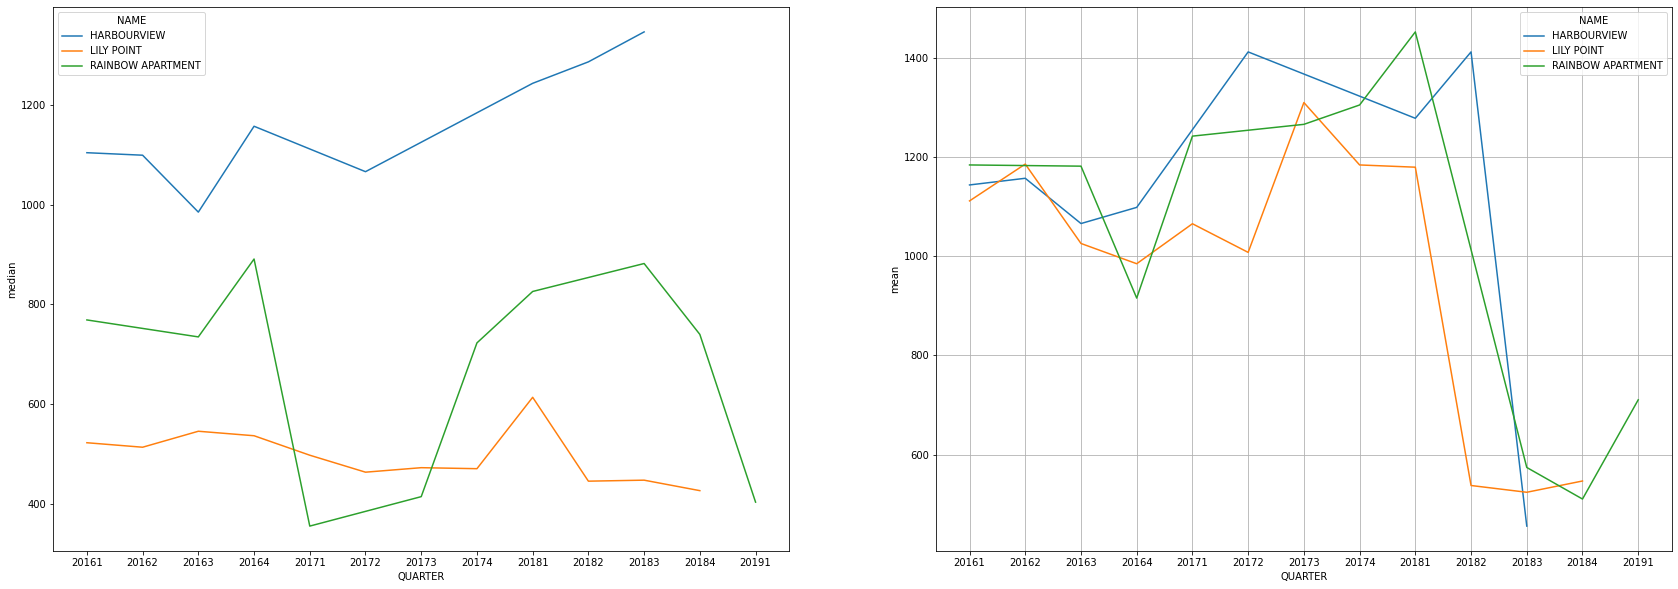

In [31]:
fig, ax =plt.subplots(1,2,figsize=(29,10))

sns.lineplot(data=Q2_2, x="QUARTER", y="median",hue="NAME",ax=ax[0])
sns.lineplot(data=Q2_2, x="QUARTER", y="mean",hue="NAME",ax=ax[1] )

fig.show()
plt.grid()

### Conclusion for Q2.2
Difference between median and mean for both Price per sqft are substantial with due to the fact that the median only calculates middle value when a data set is ordered from least to greatest. I can conclude that the average *psf_price* for each buidling has substantially decreased at the start of 2018 due to the Housing Market Crash.

## Q2.3 <a id='1.1'></a>

In [133]:
Q2_3 = pd.DataFrame(Q2_1.groupby(["QUARTER","NAME"])['Valuation price'].median())
Q2_3.reset_index(inplace=True)
Q2_3.rename(columns={"Valuation price":"Median Valuation Price"},inplace=True)
Q2_3

,QUARTER,NAME,Median Valuation Price
0,20161,HARBOURVIEW,1762500.0
1,20161,LILY POINT,574500.0
2,20161,RAINBOW APARTMENT,2120000.0
3,20162,HARBOURVIEW,850000.0
4,20162,LILY POINT,565000.0
5,20163,HARBOURVIEW,850000.0
6,20163,LILY POINT,600000.0
7,20163,RAINBOW APARTMENT,1671500.0
8,20164,HARBOURVIEW,860000.0
9,20164,LILY POINT,590000.0


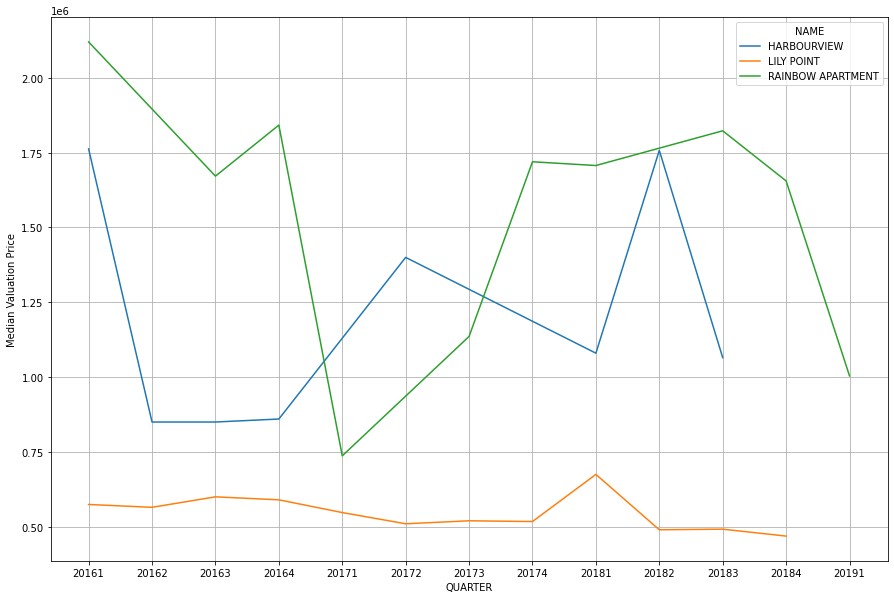

In [134]:
fig, ax =plt.subplots(figsize=(15,10))
sns.lineplot(data=Q2_3, x="QUARTER", y="Median Valuation Price",hue="NAME")
plt.grid()

###Conclustion for Q2.3
As we can see the Median Valuation Price for LILY POINT is lower among to the three buildings. For the another two buildin, i can concluse that the Median Valuation Price has substantially lower after the first 2 quarters of 2018 due to the Housing Market Crash.